# 0.0 Import Libriaries

In [15]:
import pandas as pd
import numpy as np

from sklearn import metrics as mt
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot as plt

# 0.1 Loading Datasets

In [2]:
X_train = pd.read_csv("X_training.csv")
y_train = pd.read_csv("y_training.csv")
X_val = pd.read_csv("X_validation.csv")
y_val = pd.read_csv("y_validation.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [3]:
X_train.head(3)

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,...,0.5,1.0,0.6,0.4,0.0,0.013848,1.0,0.0,1.0,0.0
1,28874,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,...,0.5,0.5,0.2,0.6,0.0,0.000000,0.0,1.0,1.0,0.0
2,21484,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,...,0.0,1.0,0.6,1.0,0.0,0.000000,1.0,0.0,1.0,0.0


In [4]:
# data preparation
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

In [5]:
# removing column "id"
X_train = X_train.drop(["id"], axis=1)
X_val = X_val.drop(["id"], axis=1)
X_test = X_test.drop(["id"], axis=1)

In [6]:
X_train.head(3)

,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,1.0,...,0.5,1.0,0.6,0.4,0.0,0.013848,1.0,0.0,1.0,0.0
1,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,0.8,...,0.5,0.5,0.2,0.6,0.0,0.000000,0.0,1.0,1.0,0.0
2,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,0.6,...,0.0,1.0,0.6,1.0,0.0,0.000000,1.0,0.0,1.0,0.0


# 1.0 Decision Tree Classifier

## 1.1 Training

In [7]:
md_list = np.arange(1, 60, 1)
acc_list =[]
precision_list = []
recall_list = []
f1_score_list = []

for i in md_list:
    # define
    model = DecisionTreeClassifier(max_depth=i)
    # fit
    model.fit(X_train, y_train)
    # predict
    yhat_train = model.predict(X_train)

    # metrics
    acc = np.round(mt.accuracy_score(y_train, yhat_train), 3)
    acc_list.append(acc)

    precision = np.round(mt.precision_score(y_train, yhat_train), 3)
    precision_list.append(precision)

    recall = np.round(mt.recall_score(y_train, yhat_train), 3)
    recall_list.append(recall)

    f1_score = np.round(mt.f1_score(y_train, yhat_train), 3)
    f1_score_list.append(f1_score)

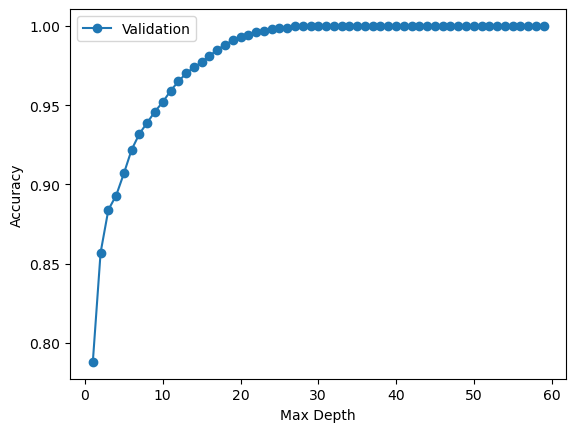

In [11]:
plt.plot(md_list, acc_list, '-o', label='Validation')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
# Best max_depth
best_md = acc_list.index(max(acc_list))
best_md

26

In [12]:
# Training Dataframe

df_results = {'max_depth': md_list,
              'Accuracy': acc_list,
              'Precision': precision_list,
              'Recall': recall_list,
              'F1-Score': f1_score_list}
df_results = pd.DataFrame(df_results)

In [13]:
df_results.loc[best_md, :]

max_depth    27.000
Accuracy      1.000
Precision     1.000
Recall        0.999
F1-Score      0.999
Name: 26, dtype: float64

## 1.2 Validaton

In [14]:
# define
model = DecisionTreeClassifier(max_depth=best_md)

# fit
model.fit(X_train, y_train)

# predict
yhat_val = model.predict(X_val)

# metrics
acc = np.round(mt.accuracy_score(y_val, yhat_val), 3)
print(f"Accuracy: {acc}")

precision = np.round(mt.precision_score(y_val, yhat_val), 3)
print(f"Precision: {precision}")

recall = np.round(mt.recall_score(y_val, yhat_val), 3)
print(f"Recall: {recall}")

f1_score = np.round(mt.f1_score(y_val, yhat_val), 3)
print(f"F1-Score: {f1_score}")

Accuracy: 0.946
Precision: 0.935
Recall: 0.94
F1-Score: 0.937


## 1.3 Test

In [16]:
# define
model = DecisionTreeClassifier(max_depth=best_md)

# fit
model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))

# predict
yhat_test = model.predict(X_test)

# metrics
acc = np.round(mt.accuracy_score(y_test, yhat_test), 3)
print(f"Accuracy: {acc}")

precision = np.round(mt.precision_score(y_test, yhat_test), 3)
print(f"Precision: {precision}")

recall = np.round(mt.recall_score(y_test, yhat_test), 3)
print(f"Recall: {recall}")

f1_score = np.round(mt.f1_score(y_test, yhat_test), 3)
print(f"F1-Score: {f1_score}")

Accuracy: 0.947
Precision: 0.939
Recall: 0.939
F1-Score: 0.939


c:\Users\alefa\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
